In [67]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [68]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [69]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [70]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()

scaler.fit(market_data_df)

scaled_data = scaler.transform(market_data_df)

scaled_df = pd.DataFrame(scaled_data, columns=market_data_df.columns, index=market_data_df.index)

print(scaled_df.head(10))

                 price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                    
bitcoin                             0.508529                    0.493193   
ethereum                            0.185446                    0.934445   
tether                              0.021774                   -0.706337   
ripple                             -0.040764                   -0.810928   
bitcoin-cash                        1.193036                    2.000959   
binancecoin                         0.891871                    1.327295   
chainlink                           0.011397                    2.572251   
cardano                             0.102530                    1.508001   
litecoin                            0.077497                    0.334297   
bitcoin-cash-sv                     0.448952                   -0.190684   

                 price_change_percentage_14d  price_change_percentage_30d  \
coin_id   

C:\Users\v_moe\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\v_moe\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\v_moe\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\v_moe\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

In [71]:
# Create a DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=market_data_df.columns, index=market_data_df.index)

# Copy the crypto names from the original data
scaled_df['coin_id'] = market_data_df.index

# Set the coinid column as index
scaled_df = scaled_df.set_index("coin_id")

# Display sample data
print(scaled_df.head(10))

                 price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                    
bitcoin                             0.508529                    0.493193   
ethereum                            0.185446                    0.934445   
tether                              0.021774                   -0.706337   
ripple                             -0.040764                   -0.810928   
bitcoin-cash                        1.193036                    2.000959   
binancecoin                         0.891871                    1.327295   
chainlink                           0.011397                    2.572251   
cardano                             0.102530                    1.508001   
litecoin                            0.077497                    0.334297   
bitcoin-cash-sv                     0.448952                   -0.190684   

                 price_change_percentage_14d  price_change_percentage_30d  \
coin_id   

### Find the Best Value for k Using the Original Scaled DataFrame.

In [72]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = list(range(1, 11))

# Create an empty list to store the inertia values
inertia_values = []


# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
   
    kmeans = KMeans(n_clusters=k)
    
    kmeans.fit(scaled_df)
    
    inertia_values.append(kmeans.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    'k_values': k_values,
    'inertia_values': inertia_values
}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
print(elbow_df)

C:\Users\v_moe\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\v_moe\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\v_moe\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\v_moe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the

C:\Users\v_moe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\v_moe\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\v_moe\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\v_moe\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)`

   k_values  inertia_values
0         1      287.000000
1         2      195.820218
2         3      123.190482
3         4       79.022435
4         5       66.002038
5         6       52.038841
6         7       43.989781
7         8       36.615242
8         9       33.406276
9        10       27.964308


C:\Users\v_moe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


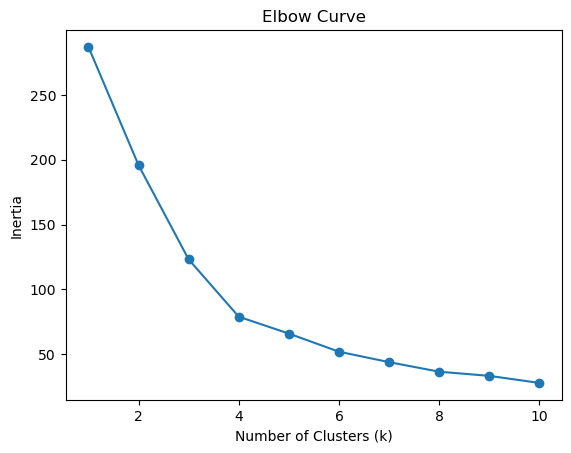

In [73]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
# Plot the line chart
import matplotlib.pyplot as plt

plt.plot(elbow_df['k_values'], elbow_df['inertia_values'], marker='o')

plt.title('Elbow Curve')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

plt.show()

#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** 4

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [74]:
# Initialize the K-Means model using the best value for k
best_k = 4  

kmeans_model = KMeans(n_clusters=best_k)


In [75]:
# Fit the K-Means model using the scaled data
kmeans_model.fit(scaled_df)

C:\Users\v_moe\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\v_moe\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\v_moe\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\v_moe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the

KMeans(n_clusters=4)

In [76]:
# Predict the clusters to group the cryptocurrencies using the scaled data
cluster_labels = kmeans_model.labels_

# View the resulting array of cluster values.
print(cluster_labels)

[3 3 0 0 3 3 3 3 3 0 0 0 0 3 0 3 0 0 3 0 0 3 0 0 0 0 0 0 3 0 0 0 1 3 0 0 2
 0 0 0 0]


In [77]:
# Create a copy of the DataFrame
scaled_df_copy = scaled_df.copy()

In [78]:
# Add a new column to the DataFrame with the predicted clusters
scaled_df_copy['predicted_cluster'] = kmeans_model.predict(scaled_df_copy)


# Display sample data
print(scaled_df_copy.head(10))


                 price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                    
bitcoin                             0.508529                    0.493193   
ethereum                            0.185446                    0.934445   
tether                              0.021774                   -0.706337   
ripple                             -0.040764                   -0.810928   
bitcoin-cash                        1.193036                    2.000959   
binancecoin                         0.891871                    1.327295   
chainlink                           0.011397                    2.572251   
cardano                             0.102530                    1.508001   
litecoin                            0.077497                    0.334297   
bitcoin-cash-sv                     0.448952                   -0.190684   

                 price_change_percentage_14d  price_change_percentage_30d  \
coin_id   

C:\Users\v_moe\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\v_moe\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\v_moe\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


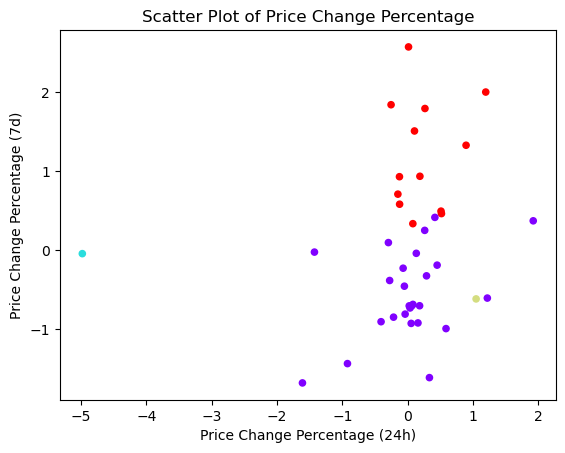

In [79]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
scaled_df_copy.plot.scatter(x="price_change_percentage_24h", y="price_change_percentage_7d", c="predicted_cluster", cmap="rainbow", colorbar=False)


plt.title('Scatter Plot of Price Change Percentage')
plt.xlabel('Price Change Percentage (24h)')
plt.ylabel('Price Change Percentage (7d)')


plt.show()

### Optimize Clusters with Principal Component Analysis.

In [80]:
# Create a PCA model instance and set `n_components=3`.
pca_model = PCA(n_components=3)

In [81]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
pca_components = pca_model.fit_transform(scaled_df)

pca_df = pd.DataFrame(pca_components, columns=['PC1', 'PC2', 'PC3'], index=scaled_df.index)

# View the first five rows of the DataFrame. 
print(pca_df.head())

                   PC1       PC2       PC3
coin_id                                   
bitcoin      -0.600667  0.842760  0.461595
ethereum     -0.458261  0.458466  0.952877
tether       -0.433070 -0.168126 -0.641752
ripple       -0.471835 -0.222660 -0.479053
bitcoin-cash -1.157800  2.041209  1.859715


C:\Users\v_moe\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\v_moe\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\v_moe\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [82]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
explained_variance = pca_model.explained_variance_ratio_

for i, ev in enumerate(explained_variance):
    print(f"Explained Variance for PC{i+1}: {ev:.4f}")

Explained Variance for PC1: 0.3720
Explained Variance for PC2: 0.3470
Explained Variance for PC3: 0.1760


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 0.8950

In [83]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you

# Creating a DataFrame with the PCA data
pca_df = pd.DataFrame(pca_components, columns=['PC1', 'PC2', 'PC3'], index=scaled_df.index)

# Copy the crypto names from the original data
pca_df['coin_id'] = scaled_df.index


# Set the coinid column as index
pca_df = pca_df.set_index("coin_id")

# Display sample data
print(pca_df.head(10))

                      PC1       PC2       PC3
coin_id                                      
bitcoin         -0.600667  0.842760  0.461595
ethereum        -0.458261  0.458466  0.952877
tether          -0.433070 -0.168126 -0.641752
ripple          -0.471835 -0.222660 -0.479053
bitcoin-cash    -1.157800  2.041209  1.859715
binancecoin     -0.516534  1.388377  0.804071
chainlink       -0.450711  0.517699  2.846143
cardano         -0.345600  0.729439  1.478013
litecoin        -0.649468  0.432165  0.600303
bitcoin-cash-sv -0.759014 -0.201200 -0.217653


### Find the Best Value for k Using the PCA Data

In [84]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = list(range(1, 11))


# Create an empty list to store the inertia values
inertia_values = []


# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    
    kmeans.fit(pca_df)
    
    inertia_values.append(kmeans.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    'k_values': k_values,
    'inertia_values': inertia_values
}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)


# Display the DataFrame
print(elbow_df)

C:\Users\v_moe\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\v_moe\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\v_moe\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\v_moe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the

C:\Users\v_moe\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\v_moe\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\v_moe\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\v_moe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the

   k_values  inertia_values
0         1      256.874086
1         2      165.901994
2         3       93.774626
3         4       49.665497
4         5       37.878747
5         6       27.618972
6         7       21.145312
7         8       17.016962
8         9       14.099786
9        10       10.484890


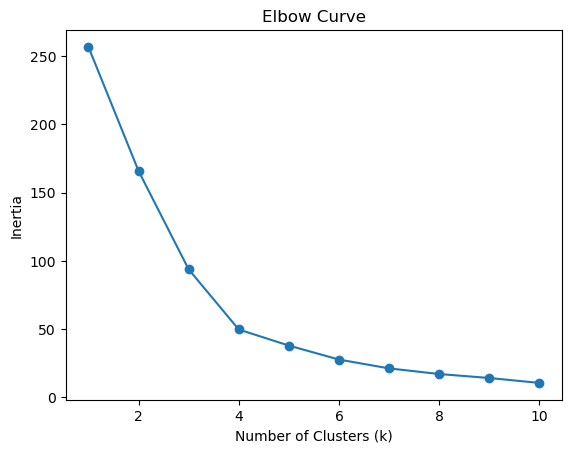

In [85]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
import matplotlib.pyplot as plt

# Plot the line chart
plt.plot(elbow_df['k_values'], elbow_df['inertia_values'], marker='o')

# Add labels and title
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

# Display the plot
plt.show()

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No
  

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [86]:
# Initialize the K-Means model using the best value for k
best_k = 4

kmeans_model = KMeans(n_clusters=best_k)

In [87]:
# Fit the K-Means model using the PCA data
kmeans_model.fit(pca_df)

C:\Users\v_moe\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\v_moe\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\v_moe\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\v_moe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the

KMeans(n_clusters=4)

In [88]:
# Predict the clusters to group the cryptocurrencies using the PCA data
cluster_labels = kmeans_model.labels_


# Print the resulting array of cluster values.
print(cluster_labels)


[0 0 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 3 0 1 1 2
 1 1 1 1]


In [89]:
# Create a copy of the DataFrame with the PCA data
pca_df_copy = pca_df.copy()


# Add a new column to the DataFrame with the predicted clusters
pca_df_copy['predicted_cluster'] = kmeans_model.predict(pca_df)


# Display sample data
print(pca_df_copy.head())


                   PC1       PC2       PC3  predicted_cluster
coin_id                                                      
bitcoin      -0.600667  0.842760  0.461595                  0
ethereum     -0.458261  0.458466  0.952877                  0
tether       -0.433070 -0.168126 -0.641752                  1
ripple       -0.471835 -0.222660 -0.479053                  1
bitcoin-cash -1.157800  2.041209  1.859715                  0


C:\Users\v_moe\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\v_moe\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\v_moe\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [90]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
import hvplot.pandas

# Create a scatter plot using hvPlot
scatter_plot = pca_df_copy.hvplot.scatter(x='PC1', y='PC2', by='predicted_cluster', hover_cols=['crypto_name'])

# Display the plot
scatter_plot

C:\Users\v_moe\anaconda3\Lib\site-packages\holoviews\core\data\pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type
C:\Users\v_moe\anaconda3\Lib\site-packages\holoviews\core\data\pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type


:NdOverlay   [predicted_cluster]
   :Scatter   [PC1]   (PC2)

### Determine the Weights of Each Feature on each Principal Component

In [91]:
# Use the columns from the original scaled DataFrame as the index.
pca_df_copy_reset_index = pca_df_copy.reset_index()

# Create a scatter plot using hvPlot with the original scaled DataFrame columns
scatter_plot = pca_df_copy_reset_index.hvplot.scatter(x='PC1', y='PC2', by='predicted_cluster', hover_cols=['crypto_name'])

# Display the plot
scatter_plot


C:\Users\v_moe\anaconda3\Lib\site-packages\holoviews\core\data\pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type
C:\Users\v_moe\anaconda3\Lib\site-packages\holoviews\core\data\pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type


:NdOverlay   [predicted_cluster]
   :Scatter   [PC1]   (PC2)

#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** Predicted_Cluster 0 and 3
    